Some code borrowed from https://github.com/ksopyla/svm_mnist_digit_classification.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
import time
import datetime as dt
from sklearn import svm,metrics
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [2]:
# Define a function for plotting images
def plot_digits(images,labels,sample_size=24,title_text='Digit {}'):
    index = np.random.choice(images.shape[0],sample_size)
    data = list(zip(images[index],labels[index]))
    img = plt.figure(num=1,figsize=(15,12),dpi=160)
    for idx,(image,label) in enumerate(data):
        plt.subplot(np.ceil(sample_size/6.0),6,idx+1)
        plt.axis('off')
        plt.imshow(image.reshape(28,28),cmap=plt.cm.gray,interpolation='nearest')
        plt.title(title_text.format(int(label)),fontsize=20)
        
    return

In [3]:
# Define a function for plotting comfusion matrix
def plot_confusion_matrix(confusion_matrix,title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.figure(num=1, figsize=(15,12), dpi=160)
    plt.imshow(confusion_matrix,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('Ground Truth')
    plt.xlabel('Prediction')
    return

In [4]:
# Define a function for plotting heatmap of validation accuracy 
# in different C and gmma
def plot_heatmap(scores,C_values,gamma_values):
    plt.figure(figsize=(8,6))
    plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores,interpolation='nearest',cmap=plt.cm.jet)
    plt.xlabel('gamma')
    plt.ylabel('C')
    plt.xticks(np.arange(len(gamma_values)),gamma_values,rotation=45)
    plt.yticks(np.arange(len(C_values)),C_values)
    plt.title('Validation Accuracy')
    plt.show()
    return

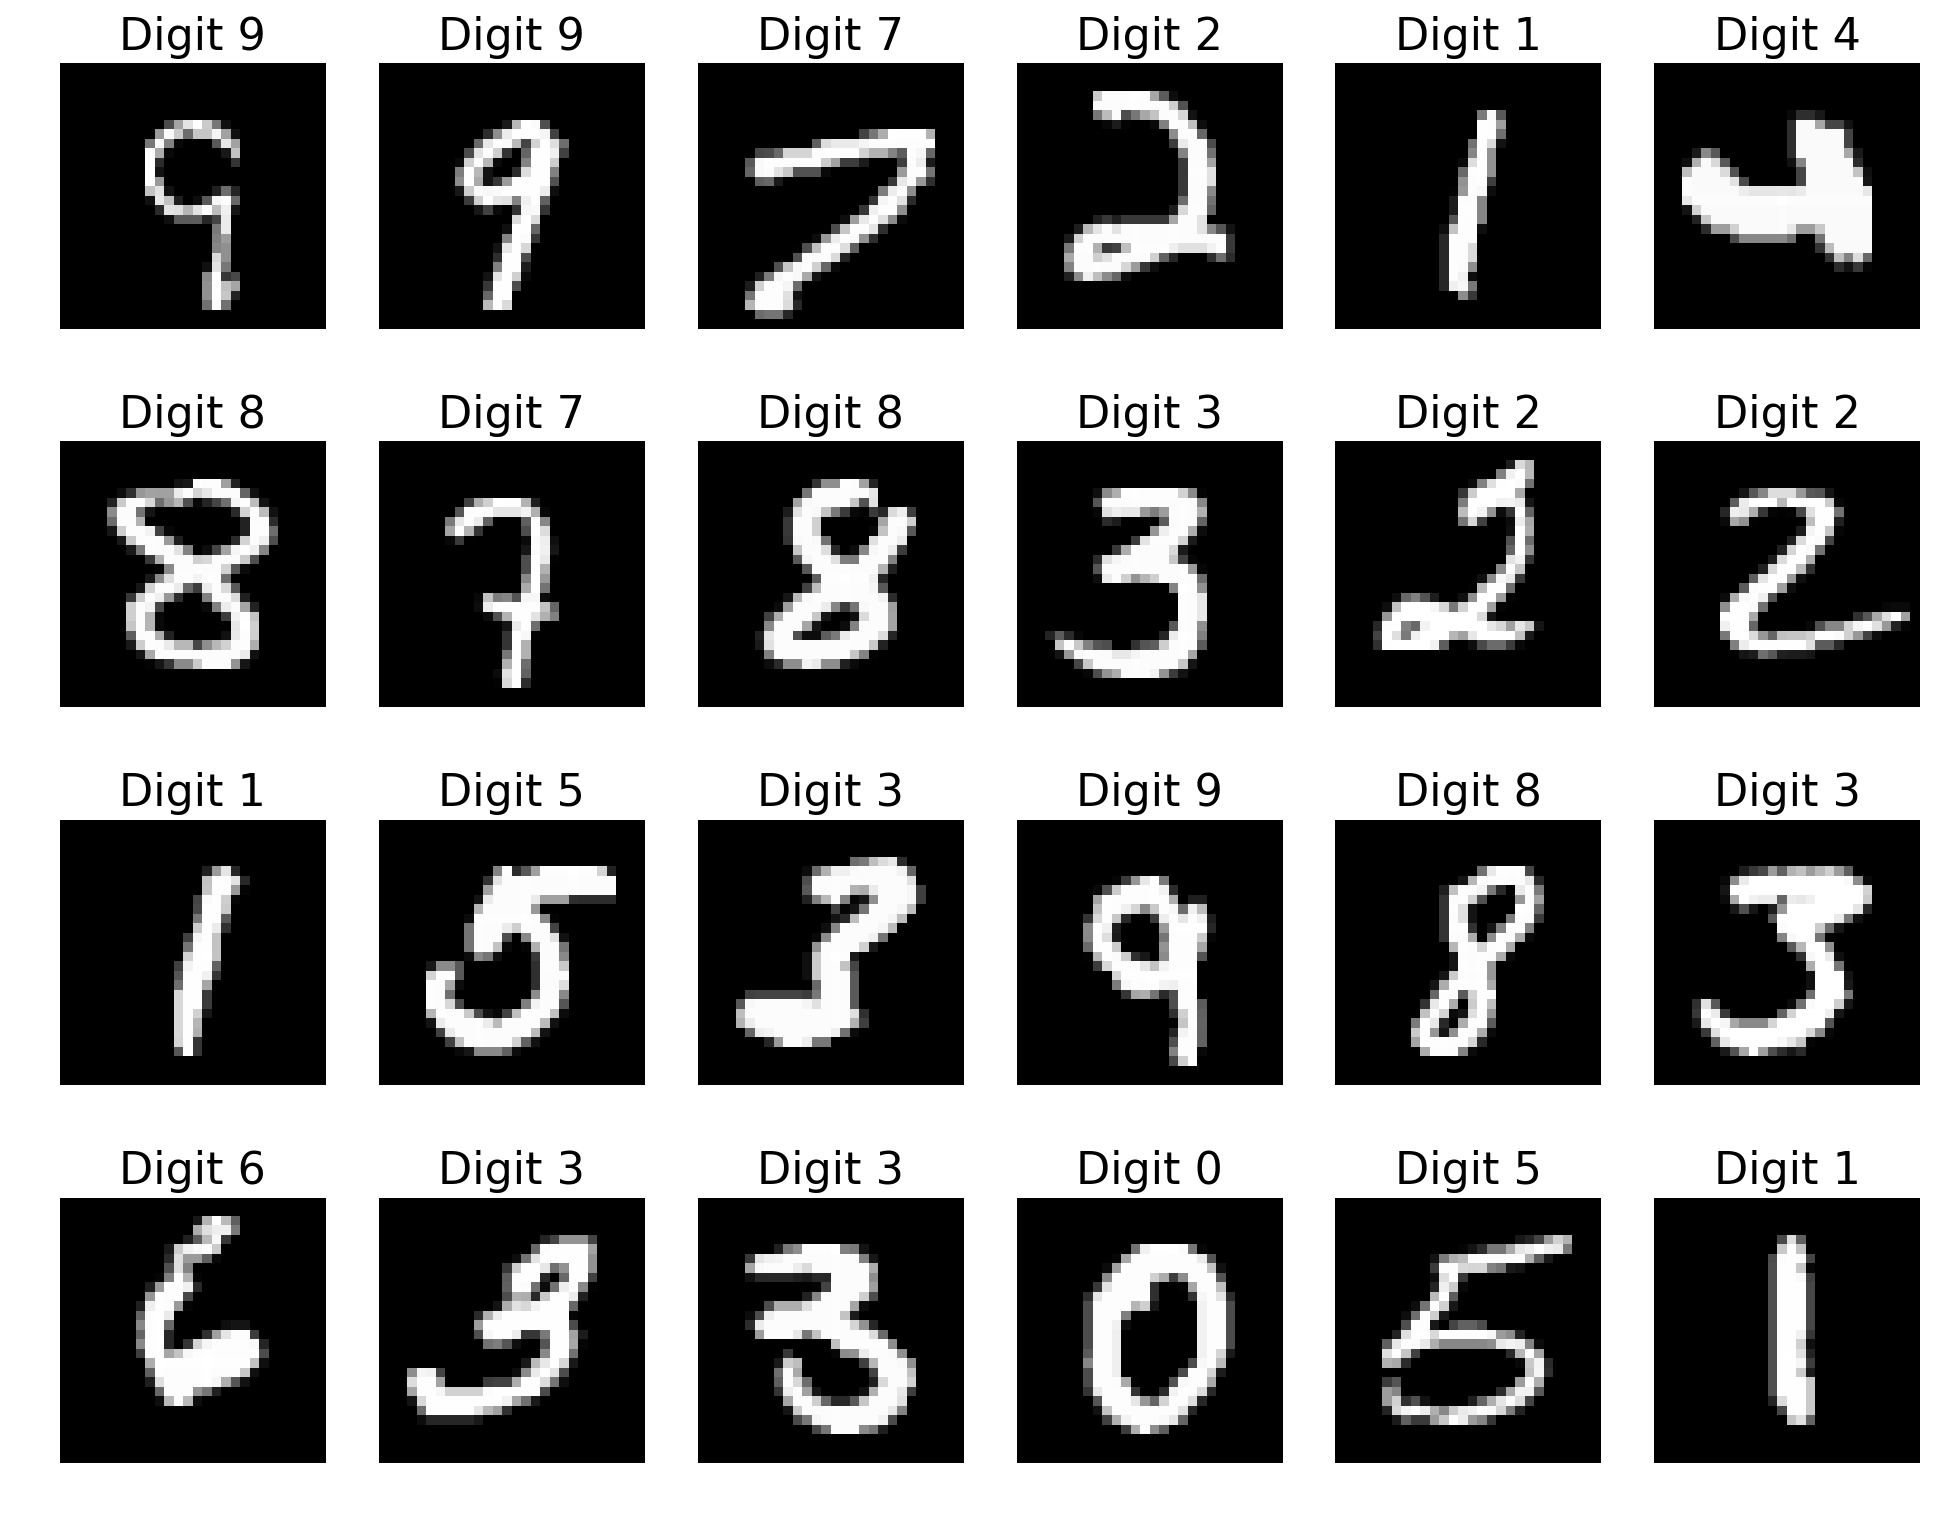

In [5]:
mnist = fetch_mldata('MNIST original',data_home='./')
images = mnist.data
labels = mnist.target
plot_digits(images,labels)

In [ ]:
# Normalize data
X = images/255.0
y = labels
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=123)
gamma_values = np.outer(np.logspace(-3,0,4), np.array([1,5]))
gamma_values = gamma_values.flatten()
C_values = np.outer(np.logspace(-1,1,3),np.array([1,5]))
C_values = C_values.flatten()

param_dict = {'kernel':['rbf'],'C':C_values,'gamma':gamma_values}

clf = svm.SVC()
grid_search = GridSearchCV(estimator=clf,param_grid=param_dict,verbose=2)

start_time = time.time()
grid_search.fit(X_train,y_train)
spend_time = time.time() - start_time
print('Spending {} on grid search'.format(spend_time))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


In [ ]:
sorted(grid_search.cv_results_.keys())
classifier = grid_search.best_estimator_
params = grid_search.best_params_
scores = grid_search.cv_results_['mean_test_score'].reshape(len(C_values),len(gamma_values))
plot_heatmap(scores,C_valuse,gamma_values)

In [ ]:
# Choose the best parameters to create the best SVC classifier
best_C = 5
best_gamma = 0.05
best_clf = svm.SVC(C=best_C,gamma=best_gamma)
start_time = time.time()
best_clf.fit(X_train,y_train)
spend_time = time.time() - start_time
print('Spending {} on training'.format(spend_time))

In [ ]:
prediction = best_clf.predict(X_test)
plot_digits(X_test,prediction,title_text='Prediction {}')

In [ ]:
print("Classification report for best_clf %s:\n%s\n"%(best_clf,metrics.classification_report(y_test,prediction)))

confusion_matrix = metrics.confusion_matrix(y_test,prediction)
print('Confusion Matrix:\n%s'%confusion_matrix)
plot_confusion_matrix(confusion_matrix)
print('Accuracy={}'.format(metrics.accuracy_score(y_test,prediction)))